<a href="https://colab.research.google.com/github/frasgado/Analisis_Censo_2020/blob/main/05_MIGRACION_NACIONAL_CENSO2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#INSTALL ORCA EN GOOGLE COLABS
#https://plotly.com/python/orca-management/

!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
E: Unable to locate package libgconf-2-4!pip
E: Couldn't find any package by glob 'libgconf-2-4!pip'
E: Unable to locate package install
E: Unable to locate package plotly
/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


#**5. Análisis de la Migración Nacional** 
CENSO 2020


---


---



In [28]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

In [29]:
df_1 = pd.read_csv('/content/drive/MyDrive/CENSO2020/conjunto_de_datos_iter_00_cpv2020.csv', index_col=0)
df_1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,...,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
ENTIDAD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,64540634,61473390,5764054,2848875,2915179,119976584,61554567,58422017,115693273,59433559,56259714,100528155,51962264,48565891,93985354,48732991,45252363,87492680,45530857,41961823,6462212,3193548,3268664,12986217,6398755,6587462,15287375,7531118,7756257,6542801,3229273,...,23887498,2085925,5460133,27527131,34805976,268863,33858339,29541708,1215497,22629812,9652823,33081729,1396774,33564054,1498766,32671764,79584,32979844,16874580,581095,30811260,25610544,16651199,16340788,4227460,7469168,23772973,32031555,13204680,13184550,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,96869,153485,10493,5193,5300,239441,91463,147978,232086,87931,144155,207748,76111,131637,197411,71344,126067,186968,66514,120454,10900,5270,5630,20793,10082,10711,24342,11538,12804,10337,4767,...,31851,7333,16206,38424,48426,13538,45470,8198,16498,34143,13743,44688,9825,47253,14708,35091,4842,43668,24373,5136,38199,26412,13608,30940,15001,13600,36738,40001,5797,3523,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,61324,85801,6798,3407,3391,139757,57628,82129,135028,55256,79772,119223,47543,71680,111530,44275,67255,104612,41184,63428,7028,3511,3517,13506,6574,6932,16724,7679,9045,7693,3268,...,19157,4351,9491,22351,28586,7607,26499,5054,9696,18089,7029,24348,6050,26036,10155,19807,2935,23841,16122,4115,21775,15880,7902,16699,8076,6330,20009,23198,3588,2177,25581,5027,11306,971,708,8247,10065,29741,5283,*
1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,728924,696683,71864,35604,36260,1352235,692561,659674,1299669,666713,632956,1116719,576593,540126,1038904,538387,500517,960764,500089,460675,78833,38679,40154,156683,77289,79394,181905,89383,92522,77815,38206,...,299141,6390,30686,348487,384361,1210,383430,355192,2137,295903,152521,382597,1011,383148,2379,380982,184,382121,130744,876,365189,335710,238571,240381,45642,105752,312002,370411,177149,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,1510,2187,165,81,84,3532,1429,2103,3420,1377,2043,3018,1179,1839,2836,1086,1750,2609,987,1622,169,80,89,345,170,175,427,211,216,182,93,...,531,39,116,646,723,78,694,195,107,608,405,708,27,719,82,610,16,704,203,12,632,561,276,529,216,407,650,684,167,43,732,205,212,48,41,39,62,530,20,*


In [30]:
# Definition onf new function
def clean_column_names(column_name):
    '''
    Function in charge of clean the column names in and standar camel case format
    '''
    return column_name.lower().strip().replace(' ', '_')


df_1 = df_1.rename(columns=clean_column_names)

##**Filtración Por Estado**



In [31]:
#df_1_filtrado = df_1[df_1['nom_loc'] == 'Total nacional']
df_porEntidad = df_1[df_1['nom_loc'] == 'Total de la Entidad']
df_porEntidad

,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,p_5ymas,p_5ymas_f,p_5ymas_m,p_12ymas,p_12ymas_f,p_12ymas_m,p_15ymas,p_15ymas_f,p_15ymas_m,p_18ymas,p_18ymas_f,p_18ymas_m,p_3a5,p_3a5_f,p_3a5_m,p_6a11,p_6a11_f,p_6a11_m,p_8a14,p_8a14_f,p_8a14_m,p_12a14,p_12a14_f,...,vph_2ymasd,vph_1cuart,vph_2cuart,vph_3ymasc,vph_c_elec,vph_s_elec,vph_aguadv,vph_aeasp,vph_aguafv,vph_tinaco,vph_cister,vph_excsa,vph_letr,vph_drenaj,vph_nodren,vph_c_serv,vph_ndeaed,vph_dsadma,vph_ndacmm,vph_snbien,vph_refri,vph_lavad,vph_hmicro,vph_autom,vph_moto,vph_bici,vph_radio,vph_tv,vph_pc,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic,tamloc
ENTIDAD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,728924,696683,71864,35604,36260,1352235,692561,659674,1299669,666713,632956,1116719,576593,540126,1038904,538387,500517,960764,500089,460675,78833,38679,40154,156683,77289,79394,181905,89383,92522,77815,38206,...,299141,6390,30686,348487,384361,1210,383430,355192,2137,295903,152521,382597,1011,383148,2379,380982,184,382121,130744,876,365189,335710,238571,240381,45642,105752,312002,370411,177149,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
2,Baja California,0,Total de la entidad Baja California,0,Total de la Entidad,NaN,NaN,NaN,3769020,1868431,1900589,149957,74010,75947,3610844,1790298,1820546,3494500,1732417,1762083,3069620,1524170,1545450,2882498,1432330,1450168,2698908,1342615,1356293,175286,86624,88662,365938,179504,186434,434167,212675,221492,187122,91840,...,798841,59355,189174,892967,1132622,8947,1117719,1069538,23823,122201,71176,1091956,44752,1101573,39745,1085176,3062,1087646,332788,5204,1086226,946647,730313,800176,66156,155157,740452,1071379,576454,576806,1080169,800189,618175,384011,216865,41223,38772,293529,9582,*
3,Baja California Sur,0,Total de la entidad Baja California Sur,0,Total de la Entidad,NaN,NaN,NaN,798447,392568,405879,35963,17821,18142,758642,372818,385824,732150,359663,372487,637296,313087,324209,597552,293482,304070,557976,274334,283642,39870,19707,20163,81476,40024,41452,94845,46621,48224,39744,19605,...,154268,31013,38337,168738,235285,2826,226124,210742,11973,195709,64637,230755,5610,231864,6170,220917,450,229382,73154,1493,219805,164034,115666,161315,18099,28452,142908,214312,108948,91750,226517,148723,136538,67961,36197,14508,8675,77223,2608,*
4,Campeche,0,Total de la entidad Campeche,0,Total de la Entidad,NaN,NaN,NaN,928363,471424,456939,45541,22506,23035,878528,446774,431754,845134,430162,414972,730335,373837,356498,682951,350650,332301,637189,328098,309091,50104,24850,25254,98089,48087,50002,112766,55251,57515,47384,23187,...,142732,38000,57062,163902,255453,3516,248625,223034,10343,188401,52939,245200,5610,245656,13279,236503,889,243050,128025,5559,218630,201206,86222,89762,64350,62159,136266,226163,87769,68843,218322,114020,151613,38508,17976,23627,36397,130361,12028,*
5,Coahuila de Zaragoza,0,Total de la entidad Coahuila de Zaragoza,0,Total de la Entidad,NaN,NaN,NaN,3146771,1583102,1563669,160368,79095,81273,2980244,1500922,1479322,2860700,1441917,1418783,2475441,1252864,1222577,2316332,1174267,1142065,2157771,1096368,1061403,177691,87469,90222,327112,160589,166523,375447,184431,191016,159109,78597,...,677432,14549,74407,809324,895921,2396,889513,859115,8789,598397,122510,882547,11349,886984,11235,879659,538,880714,321539,2308,870949,780014,574724,554420,67634,167028,642682,863515,367970,372132,824291,519599,443659,195883,124077,17020,46420,332298,5754,*
6,Colima,0,Total de la entidad Colima,0,Total de la Entidad,NaN,NaN,NaN,731391,370769,360622,29614,14483,15131,699821,355305,344516,677122,344007,333115,592408,302457,289951,556272,284755,271517,520033,266970,253063,34469,17025,17444,72944,35823,37121,85323,41826,43497,36136,17702,...,152586,11457,420

In [32]:
#pnacent  poblacion nacida en la entidad
#pnacent_f
#pnacent_m
#pnacoe   Poblacion nacida en otra entidad
#pnacoe_f
#pnacoe_m
#Personas nacidas en la misma entidad federativa VS Personas nacidas en otra entidad federativa
df2_porEntidad = df_porEntidad[['nom_ent', 'pobtot', 'pobfem', 'pobmas', 'pnacent', 'pnacent_f', 'pnacent_m', 'pnacoe', 'pnacoe_f', 'pnacoe_m']]

df2_porEntidad


,nom_ent,pobtot,pobfem,pobmas,pnacent,pnacent_f,pnacent_m,pnacoe,pnacoe_f,pnacoe_m
ENTIDAD,,,,,,,,,,
1,Aguascalientes,1425607,728924,696683,1133247,576781,556466,276430,144420,132010
2,Baja California,3769020,1868431,1900589,2136493,1055376,1081117,1463949,735208,728741
3,Baja California Sur,798447,392568,405879,470255,234464,235791,313283,151310,161973
4,Campeche,928363,471424,456939,716025,364562,351463,199443,100331,99112
5,Coahuila de Zaragoza,3146771,1583102,1563669,2711206,1365165,1346041,398612,200206,198406
6,Colima,731391,370769,360622,525860,266764,259096,193703,98633,95070
7,Chiapas,5543828,2837881,2705947,5276515,2704331,2572184,174961,87981,86980
8,Chihuahua,3741869,1888047,1853822,3061312,1553841,1507471,561040,279227,281813
9,Ciudad de México,9209944,4805017,4404927,7404454,3807741,3596713,1679063,934710,744353


In [33]:
df2_porEntidad['abrev'] = ['AGS', 'BC', 'BCS', 'CAMP', 'COAH', 'COL', 'CHIS','CHIH', 'CDMX', 'DGO', 'GTO', 'GRO', 'HGO', 'JAL', 'EDOMEX', 'MICH', 'MOR', 'NAY', 'NL', 'OAX', 'PUE', 'QRO', 'QROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAMPS','TLAX', 'VER', 'YUC', 'ZAC']
df2_porEntidad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nom_ent,pobtot,pobfem,pobmas,pnacent,pnacent_f,pnacent_m,pnacoe,pnacoe_f,pnacoe_m,abrev
ENTIDAD,,,,,,,,,,,
1,Aguascalientes,1425607,728924,696683,1133247,576781,556466,276430,144420,132010,AGS
2,Baja California,3769020,1868431,1900589,2136493,1055376,1081117,1463949,735208,728741,BC
3,Baja California Sur,798447,392568,405879,470255,234464,235791,313283,151310,161973,BCS
4,Campeche,928363,471424,456939,716025,364562,351463,199443,100331,99112,CAMP
5,Coahuila de Zaragoza,3146771,1583102,1563669,2711206,1365165,1346041,398612,200206,198406,COAH
6,Colima,731391,370769,360622,525860,266764,259096,193703,98633,95070,COL
7,Chiapas,5543828,2837881,2705947,5276515,2704331,2572184,174961,87981,86980,CHIS
8,Chihuahua,3741869,1888047,1853822,3061312,1553841,1507471,561040,279227,281813,CHIH
9,Ciudad de México,9209944,4805017,4404927,7404454,3807741,3596713,1679063,934710,744353,CDMX


In [34]:
df2_porEntidad.info()
df2_porEntidad.pnacent     = df2_porEntidad.pnacent.astype(float)
df2_porEntidad.pnacent_f   = df2_porEntidad.pnacent_f.astype(float)
df2_porEntidad.pnacent_m   = df2_porEntidad.pnacent_m.astype(float)
df2_porEntidad.pnacoe      = df2_porEntidad.pnacoe.astype(float)
df2_porEntidad.pnacoe_f    = df2_porEntidad.pnacoe_f.astype(float)
df2_porEntidad.pnacoe_m    = df2_porEntidad.pnacoe_m.astype(float)
df2_porEntidad.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nom_ent    32 non-null     object
 1   pobtot     32 non-null     int64 
 2   pobfem     32 non-null     object
 3   pobmas     32 non-null     object
 4   pnacent    32 non-null     object
 5   pnacent_f  32 non-null     object
 6   pnacent_m  32 non-null     object
 7   pnacoe     32 non-null     object
 8   pnacoe_f   32 non-null     object
 9   pnacoe_m   32 non-null     object
 10  abrev      32 non-null     object
dtypes: int64(1), object(10)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nom_ent    32 non-null     object 
 1   pobtot     32 non-null     int64  
 2   pobfem     32 non-null     object 
 3   pobmas     32 non-null     obje

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df2_porEntidad['sumaGeneroPN'] = df2_porEntidad['pnacent'].add(df2_porEntidad['pnacoe'].astype(float), fill_value=0)
df2_porEntidad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nom_ent,pobtot,pobfem,pobmas,pnacent,pnacent_f,pnacent_m,pnacoe,pnacoe_f,pnacoe_m,abrev,sumaGeneroPN
ENTIDAD,,,,,,,,,,,,
1,Aguascalientes,1425607,728924,696683,1133247.0,576781.0,556466.0,276430.0,144420.0,132010.0,AGS,1409677.0
2,Baja California,3769020,1868431,1900589,2136493.0,1055376.0,1081117.0,1463949.0,735208.0,728741.0,BC,3600442.0
3,Baja California Sur,798447,392568,405879,470255.0,234464.0,235791.0,313283.0,151310.0,161973.0,BCS,783538.0
4,Campeche,928363,471424,456939,716025.0,364562.0,351463.0,199443.0,100331.0,99112.0,CAMP,915468.0
5,Coahuila de Zaragoza,3146771,1583102,1563669,2711206.0,1365165.0,1346041.0,398612.0,200206.0,198406.0,COAH,3109818.0
6,Colima,731391,370769,360622,525860.0,266764.0,259096.0,193703.0,98633.0,95070.0,COL,719563.0
7,Chiapas,5543828,2837881,2705947,5276515.0,2704331.0,2572184.0,174961.0,87981.0,86980.0,CHIS,5451476.0
8,Chihuahua,3741869,1888047,1853822,3061312.0,1553841.0,1507471.0,561040.0,279227.0,281813.0,CHIH,3622352.0
9,Ciudad de México,9209944,4805017,4404927,7404454.0,3807741.0,3596713.0,1679063.0,934710.0,744353.0,CDMX,9083517.0


In [36]:
df2_porEntidad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nom_ent       32 non-null     object 
 1   pobtot        32 non-null     int64  
 2   pobfem        32 non-null     object 
 3   pobmas        32 non-null     object 
 4   pnacent       32 non-null     float64
 5   pnacent_f     32 non-null     float64
 6   pnacent_m     32 non-null     float64
 7   pnacoe        32 non-null     float64
 8   pnacoe_f      32 non-null     float64
 9   pnacoe_m      32 non-null     float64
 10  abrev         32 non-null     object 
 11  sumaGeneroPN  32 non-null     float64
dtypes: float64(7), int64(1), object(4)
memory usage: 3.2+ KB


##Transformación de Datos para trabajar con datos numéricos y absolutos


In [37]:
tab_migracion = df2_porEntidad.rename(columns={'pnacent':'Nacionales',
                                   'pnacoe':'Migrantes'})
tab_migracion = tab_migracion[['abrev', 'Nacionales', 'Migrantes']]
tab_migracion

,abrev,Nacionales,Migrantes
ENTIDAD,,,
1,AGS,1133247.0,276430.0
2,BC,2136493.0,1463949.0
3,BCS,470255.0,313283.0
4,CAMP,716025.0,199443.0
5,COAH,2711206.0,398612.0
6,COL,525860.0,193703.0
7,CHIS,5276515.0,174961.0
8,CHIH,3061312.0,561040.0
9,CDMX,7404454.0,1679063.0


In [38]:
#Migración
#Ordernar por Migrante, Nacional abrev		
tab_migracion_edo = tab_migracion.sort_values(by=['Migrantes','Nacionales'], ascending=False)
tab_migracion_edo = tab_migracion_edo.reset_index()
tab_migracion_edo.drop('ENTIDAD', axis=1, inplace=True)
tab_migracion_edo


,abrev,Nacionales,Migrantes
0,EDOMEX,11669688.0,5190562.0
1,CDMX,7404454.0,1679063.0
2,BC,2136493.0,1463949.0
3,NL,4381647.0,1319964.0
4,JAL,7128608.0,1067778.0
5,QROO,848545.0,945101.0
6,TAMPS,2683881.0,764320.0
7,VER,7263551.0,762798.0
8,QRO,1648076.0,686545.0
9,PUE,5882027.0,660918.0


In [39]:
tabulador = tab_migracion_edo.melt(id_vars=['abrev'],
                                       value_vars=['Migrantes', 'Nacionales'], 
                                       var_name='estatus', 
                                       value_name='value')
tabulador.head(60)

,abrev,estatus,value
0,EDOMEX,Migrantes,5190562.0
1,CDMX,Migrantes,1679063.0
2,BC,Migrantes,1463949.0
3,NL,Migrantes,1319964.0
4,JAL,Migrantes,1067778.0
5,QROO,Migrantes,945101.0
6,TAMPS,Migrantes,764320.0
7,VER,Migrantes,762798.0
8,QRO,Migrantes,686545.0
9,PUE,Migrantes,660918.0


##Visualización de datos Migración con datos enteros

- Usando plotly.express

In [62]:
#tabulador
fig = px.bar(tabulador, x="value", y="abrev", 
             color="estatus", 
             orientation='h',
             height=800,
             barmode = "group", #"group", #por defecto es "relative",
             #text="estatus",
             title="<b>Migración<br>Personas nacidas en otra entidad federativa vs Personas nacidas en la misma entidad federativa</br></b>")

#<b>Migración<br>Personas nacidas en la misma entidad federativa VS Personas nacidas en otra entidad federativa</br></b>

fig.update_layout({
'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
'paper_bgcolor' : 'rgba(0, 0, 0, 0)'  
})
fig.update_layout(xaxis_tickangle=-90)
fig.update_layout(
    yaxis=dict(
        title='',
    ),
    xaxis=dict(
        title='Fuente: INEGI. Censo de Población y Vivienda 2020.<br>Elaboró: Fabiola Rasgado</br>',
    )
)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.74,
    xanchor="left",
    x=0.80
))
fig.update_traces(hovertemplate='<b>%{label}</b><br><br>%{value:,.0f} Personas. <br>')

# DATOS CLAVES
fig.add_annotation(text="<b>DATOS CLAVES EN LA MIGRACION INTERNA:</b><br>- MAYOR:    EDOMEX, tres veces más<br>                  por lo registrado en CDMX</br>- MENOR:    CHIAPAS</br>- QROO:      Número de MIGRANTES es MAYOR a<br>                  PERSONAS LOCALES",
                  xref="paper", yref="paper",
                  align='left',
                  x=0.98, y=0.90, 
                  showarrow=False)

fig.add_annotation(text="* Número de migrantes sobrepasa a la población nativa ",
                  xref="paper", yref="paper",
                  align='left',
                  x=0.08, y=0.16, 
                  showarrow=False)

fig.write_html("05_Numero_de_Personas_en_Migracion_por_Estado.html")
fig.write_image("05_Numero_de_Personas_en_Migracion_por_Estado.jpg")

fig.show()


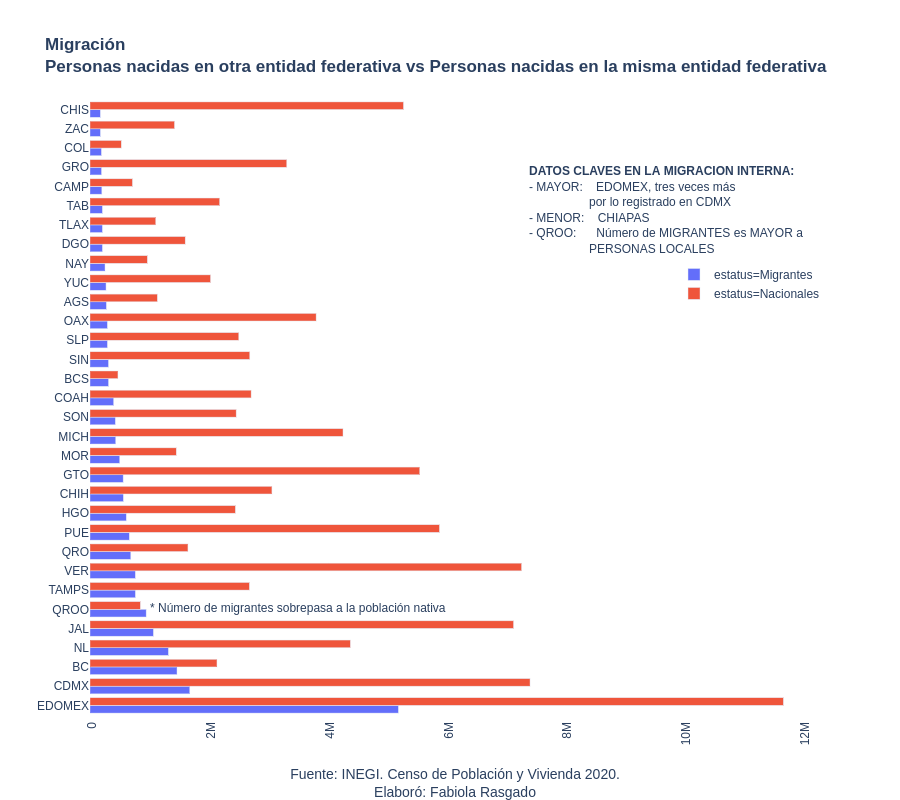

In [63]:
# Exportar en formato png 
# En formato HTML, se tiene mejor experiencia de usuario porque hay interacción 
# con los de la gráfica.
#height=350, 
img_bytes = fig.to_image(format="png", width=900, scale=1)
from IPython.display import Image
Image(img_bytes)


##**Transformación de datos para obtener porcentajes**

In [41]:
df2_porEntidad['%Nacionales'] = df2_porEntidad.groupby(['pnacent','sumaGeneroPN'], group_keys=False).apply(lambda g: round((g.pnacent.astype(float)/g.sumaGeneroPN) * 100,2)) 
df2_porEntidad['%Migrantes'] = df2_porEntidad.groupby(['pnacoe','sumaGeneroPN'], group_keys=False).apply(lambda g: round((g.pnacoe.astype(float)/g.sumaGeneroPN) * 100,2)) 
df2_porEntidad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nom_ent,pobtot,pobfem,pobmas,pnacent,pnacent_f,pnacent_m,pnacoe,pnacoe_f,pnacoe_m,abrev,sumaGeneroPN,%Nacionales,%Migrantes
ENTIDAD,,,,,,,,,,,,,,
1,Aguascalientes,1425607,728924,696683,1133247.0,576781.0,556466.0,276430.0,144420.0,132010.0,AGS,1409677.0,80.39,19.61
2,Baja California,3769020,1868431,1900589,2136493.0,1055376.0,1081117.0,1463949.0,735208.0,728741.0,BC,3600442.0,59.34,40.66
3,Baja California Sur,798447,392568,405879,470255.0,234464.0,235791.0,313283.0,151310.0,161973.0,BCS,783538.0,60.02,39.98
4,Campeche,928363,471424,456939,716025.0,364562.0,351463.0,199443.0,100331.0,99112.0,CAMP,915468.0,78.21,21.79
5,Coahuila de Zaragoza,3146771,1583102,1563669,2711206.0,1365165.0,1346041.0,398612.0,200206.0,198406.0,COAH,3109818.0,87.18,12.82
6,Colima,731391,370769,360622,525860.0,266764.0,259096.0,193703.0,98633.0,95070.0,COL,719563.0,73.08,26.92
7,Chiapas,5543828,2837881,2705947,5276515.0,2704331.0,2572184.0,174961.0,87981.0,86980.0,CHIS,5451476.0,96.79,3.21
8,Chihuahua,3741869,1888047,1853822,3061312.0,1553841.0,1507471.0,561040.0,279227.0,281813.0,CHIH,3622352.0,84.51,15.49
9,Ciudad de México,9209944,4805017,4404927,7404454.0,3807741.0,3596713.0,1679063.0,934710.0,744353.0,CDMX,9083517.0,81.52,18.48


In [42]:
#Migración
#Ordernar por Migrante, Nacional abrev		
tab_porc_migracion_edo = df2_porEntidad.sort_values(by=['%Migrantes','%Nacionales'], ascending=False)
tab_porc_migracion_edo = tab_porc_migracion_edo.reset_index()
tab_porc_migracion_edo.drop('ENTIDAD', axis=1, inplace=True)
tab_porc_migracion_edo

,nom_ent,pobtot,pobfem,pobmas,pnacent,pnacent_f,pnacent_m,pnacoe,pnacoe_f,pnacoe_m,abrev,sumaGeneroPN,%Nacionales,%Migrantes
0,Quintana Roo,1857985,921206,936779,848545.0,420372.0,428173.0,945101.0,468054.0,477047.0,QROO,1793646.0,47.31,52.69
1,Baja California,3769020,1868431,1900589,2136493.0,1055376.0,1081117.0,1463949.0,735208.0,728741.0,BC,3600442.0,59.34,40.66
2,Baja California Sur,798447,392568,405879,470255.0,234464.0,235791.0,313283.0,151310.0,161973.0,BCS,783538.0,60.02,39.98
3,México,16992418,8741123,8251295,11669688.0,5940122.0,5729566.0,5190562.0,2746909.0,2443653.0,EDOMEX,16860250.0,69.21,30.79
4,Querétaro,2368467,1211647,1156820,1648076.0,843268.0,804808.0,686545.0,351721.0,334824.0,QRO,2334621.0,70.59,29.41
5,Colima,731391,370769,360622,525860.0,266764.0,259096.0,193703.0,98633.0,95070.0,COL,719563.0,73.08,26.92
6,Morelos,1971520,1020673,950847,1451544.0,741049.0,710495.0,500693.0,269893.0,230800.0,MOR,1952237.0,74.35,25.65
7,Nuevo León,5784442,2893492,2890950,4381647.0,2192985.0,2188662.0,1319964.0,661997.0,657967.0,NL,5701611.0,76.85,23.15
8,Tamaulipas,3527735,1791595,1736140,2683881.0,1355153.0,1328728.0,764320.0,399646.0,364674.0,TAMPS,3448201.0,77.83,22.17
9,Campeche,928363,471424,456939,716025.0,364562.0,351463.0,199443.0,100331.0,99112.0,CAMP,915468.0,78.21,21.79


In [43]:
tab_porc_migracion = tab_porc_migracion_edo.melt(id_vars=['abrev'],
                                       value_vars=['%Migrantes', '%Nacionales'], 
                                       var_name='estatus', 
                                       value_name='value')
tab_porc_migracion.head(60)

,abrev,estatus,value
0,QROO,%Migrantes,52.69
1,BC,%Migrantes,40.66
2,BCS,%Migrantes,39.98
3,EDOMEX,%Migrantes,30.79
4,QRO,%Migrantes,29.41
5,COL,%Migrantes,26.92
6,MOR,%Migrantes,25.65
7,NL,%Migrantes,23.15
8,TAMPS,%Migrantes,22.17
9,CAMP,%Migrantes,21.79


##Visualización de datos Migración con Porcentajes

In [59]:
fig = px.bar(tab_porc_migracion, x="abrev", y="value", 
             color="estatus", 
             barmode="stack",
             #text="estatus",
             title="<b>Migración - Porcentaje<br>Personas nacidas en otra entidad federativa vs Personas nacidas en la misma entidad federativa</br><br></b>"
             )


fig.update_layout({
'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
'paper_bgcolor' : 'rgba(0, 0, 0, 0)'  
})
fig.update_layout(xaxis_tickangle=-90)
fig.update_layout(
    yaxis=dict(
        title='',
    ),
    xaxis=dict(
        title='Fuente: INEGI. Censo de Población y Vivienda 2020.<br>Elaboró: Fabiola Rasgado</br>',
    )
)
fig.update_layout(barmode='stack')
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.05,
    xanchor="left",
    x=0.63,
    orientation='h',
))
fig.update_traces(hovertemplate='<b>%{label}</b><br><br>%{value:,.0f}%     <br>')

fig.write_html("05_Porcentaje_Migracion_por_Estado.html")
fig.write_image("05_Porcentaje_Migracion_por_Estado.jpeg")
fig.show()



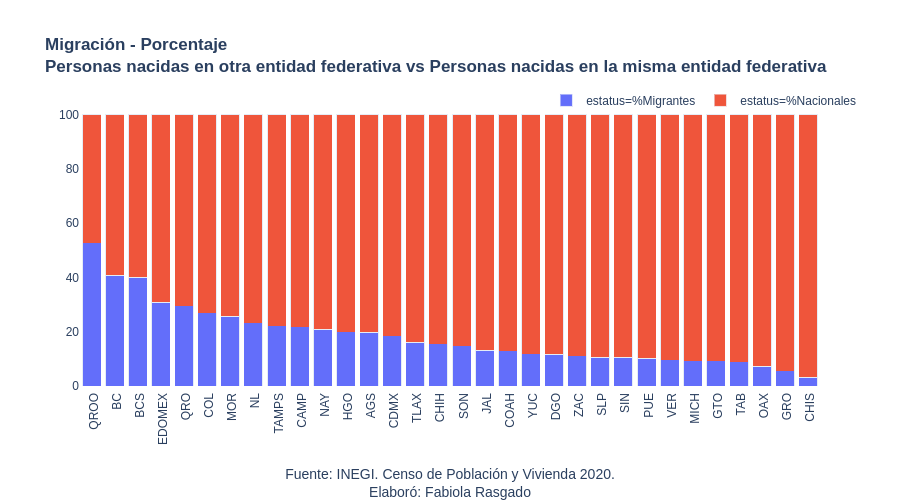

In [60]:
#img_bytes = fig.to_image(format="png")
img_bytes = fig.to_image(format="png", width=900, scale=1)
from IPython.display import Image
Image(img_bytes)
